In [1]:
import os
print(os.getcwd())


/DATA05/home/youwone/Singlecell/SCLC


In [2]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

In [3]:

import numpy as np
np.version
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib as mpl
import anndata
#import bbknn
import os
from scipy import sparse

from matplotlib import rcParams

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('default')  

sc.settings.set_figure_params(dpi=80)

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()
sc.logging.print_header()

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
2024-11-25 14:31:14.035171: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-25 14:31:14.166315: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-25 14:31:14.169602: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'

scanpy==1.9.8 anndata==0.10.8 umap==0.5.3 numpy==1.23.5 scipy==1.12.0 pandas==1.5.3 scikit-learn==1.5.1 statsmodels==0.13.5 igraph==0.9.9 louvain==0.7.0 pynndescent==0.5.4


In [4]:
import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

In [5]:
import seaborn as sns

In [6]:
Epi=sc.read('./Public_SCLC_EPI_raw.h5ad')
Epi

/DATA05/home/youwone/.local/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 53944 × 22349
    obs: 'ngenes', 'libsize', 'mito_frac', 'RBP_frac', 'batch', 'donor_id', 'treatment', 'procedure', 'histo', 'cell_type_coarse', 'cell_type_fine', 'cell_type_general', 'clusters', 'cell_type_med', 'H_knn', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'is_primary_data', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'organism_ontology_term_id', 'cell_type_ontology_term_id', 'suspension_type', 'HTAN_Biospecimen_ID', 'HTAN_Participant_ID', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublets', 'CELL_type', 'cnv_leiden', 'cnv_score', 'predicted_tumor', 'last'
    var: 'feature_is_filtered', 'feature_reference', 'feature_biotype', 'fe

In [7]:
cells_of_interest = Epi.obs.loc[Epi.obs['treatment'].isin([  
  'Naive',
]),:].index
Epi2=  Epi[cells_of_interest, :]
Epi2

View of AnnData object with n_obs × n_vars = 21855 × 22349
    obs: 'ngenes', 'libsize', 'mito_frac', 'RBP_frac', 'batch', 'donor_id', 'treatment', 'procedure', 'histo', 'cell_type_coarse', 'cell_type_fine', 'cell_type_general', 'clusters', 'cell_type_med', 'H_knn', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'is_primary_data', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'organism_ontology_term_id', 'cell_type_ontology_term_id', 'suspension_type', 'HTAN_Biospecimen_ID', 'HTAN_Participant_ID', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublets', 'CELL_type', 'cnv_leiden', 'cnv_score', 'predicted_tumor', 'last'
    var: 'feature_is_filtered', 'feature_reference', 'feature_bioty

In [8]:
cells_of_interest = Epi2.obs.loc[Epi2.obs['tissue'].isin([  
  'lung',
]),:].index
Epi4=  Epi2[cells_of_interest, :]
Epi4

View of AnnData object with n_obs × n_vars = 12123 × 22349
    obs: 'ngenes', 'libsize', 'mito_frac', 'RBP_frac', 'batch', 'donor_id', 'treatment', 'procedure', 'histo', 'cell_type_coarse', 'cell_type_fine', 'cell_type_general', 'clusters', 'cell_type_med', 'H_knn', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'is_primary_data', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'organism_ontology_term_id', 'cell_type_ontology_term_id', 'suspension_type', 'HTAN_Biospecimen_ID', 'HTAN_Participant_ID', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublets', 'CELL_type', 'cnv_leiden', 'cnv_score', 'predicted_tumor', 'last'
    var: 'feature_is_filtered', 'feature_reference', 'feature_bioty

In [10]:
Epi4.write('./Public_SCLC_EPI__naive_primary_raw.h5ad')
Epi4

View of AnnData object with n_obs × n_vars = 12123 × 22349
    obs: 'ngenes', 'libsize', 'mito_frac', 'RBP_frac', 'batch', 'donor_id', 'treatment', 'procedure', 'histo', 'cell_type_coarse', 'cell_type_fine', 'cell_type_general', 'clusters', 'cell_type_med', 'H_knn', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'is_primary_data', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'organism_ontology_term_id', 'cell_type_ontology_term_id', 'suspension_type', 'HTAN_Biospecimen_ID', 'HTAN_Participant_ID', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublets', 'CELL_type', 'cnv_leiden', 'cnv_score', 'predicted_tumor', 'last'
    var: 'feature_is_filtered', 'feature_reference', 'feature_bioty

In [13]:
Epi4.obs['tissue'].unique()

['lung']
Categories (1, object): ['lung']

In [14]:
sc.pp.log1p(Epi4)

/DATA05/home/youwone/.local/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:372: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [15]:
sc.pp.highly_variable_genes(Epi4, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


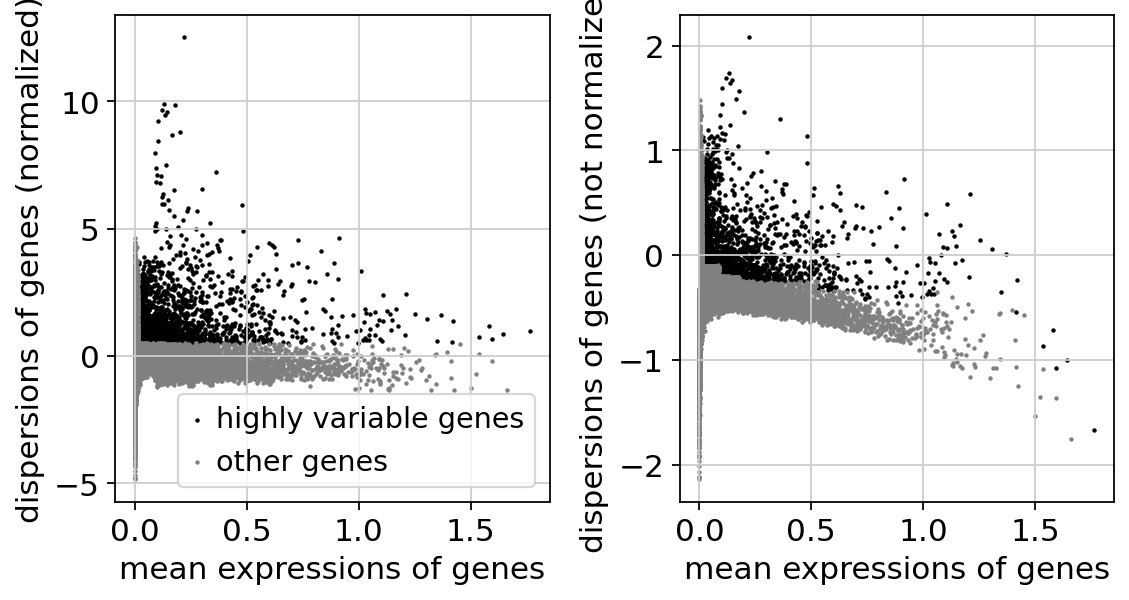

In [16]:
sc.pl.highly_variable_genes(Epi4)

In [17]:
Epi4.raw = Epi4


In [18]:
Epi4.raw

In [19]:
adata_slice = Epi4[:, Epi4.var.highly_variable]

In [20]:
sc.pp.regress_out(adata_slice, ['total_counts', 'pct_counts_mt'])
#adata_slice.write('con2_DAAN6.1_regressed.h5ad')
sc.pp.scale(adata_slice, max_value=10)
#adata_slice.write('con2_DAAN6.1_regressed_scale.h5ad')

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:00:17)


computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


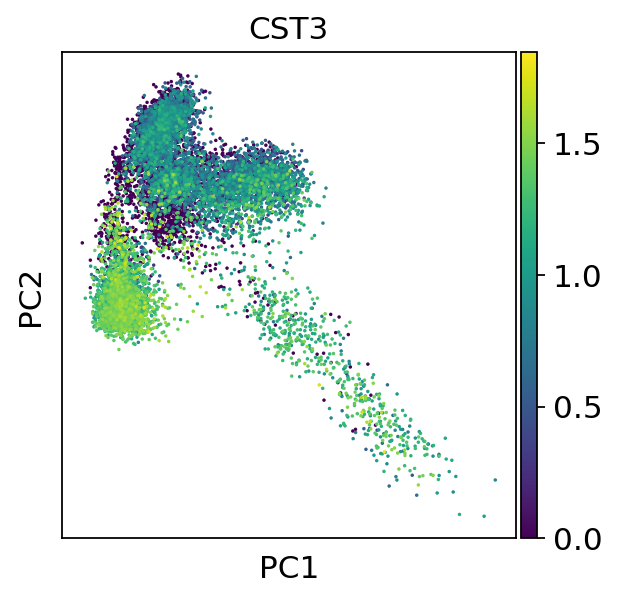

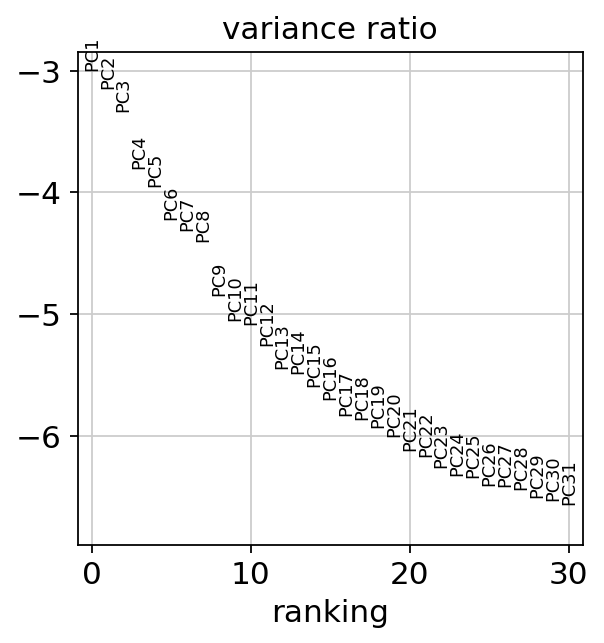

In [21]:
#-- PCA
sc.tl.pca(adata_slice, svd_solver='arpack')
sc.pl.pca(adata_slice, color='CST3')


sc.pl.pca_variance_ratio(adata_slice, log=True)

In [22]:
import scanpy.external as sce

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:14)


2024-11-25 14:32:58,783 - harmonypy - INFO - Iteration 1 of 10
2024-11-25 14:33:01,106 - harmonypy - INFO - Iteration 2 of 10
2024-11-25 14:33:03,139 - harmonypy - INFO - Converged after 2 iterations


computing neighbors
    finished: added to `.uns['harmony']`
    `.obsp['harmony_distances']`, distances for each pair of neighbors
    `.obsp['harmony_connectivities']`, weighted adjacency matrix (0:00:04)
running Leiden clustering
    finished: found 9 clusters and added
    'leiden_0.3', the cluster labels (adata.obs, categorical) (0:00:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:15)


/DATA05/home/youwone/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/DATA05/home/youwone/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/DATA05/home/youwone/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


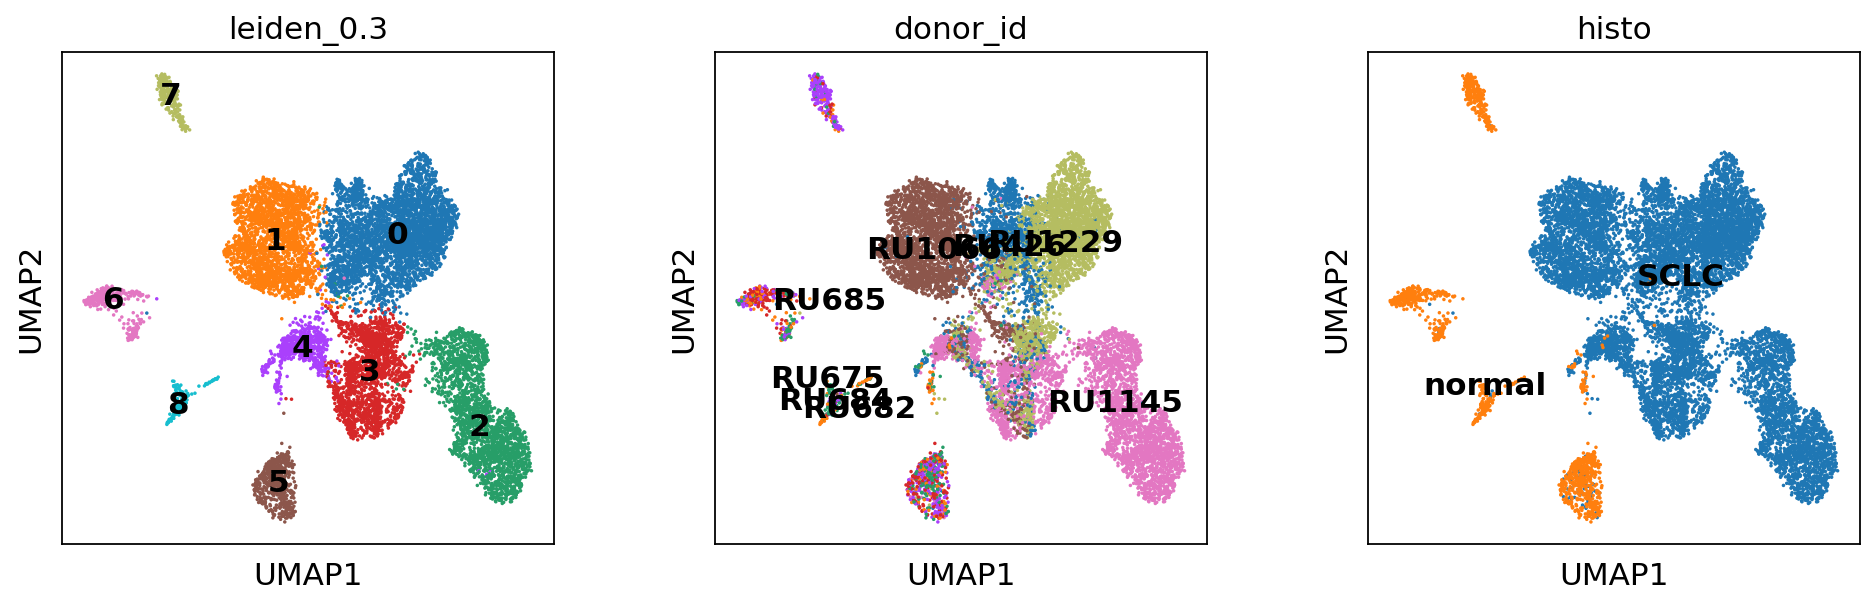

/DATA05/home/youwone/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


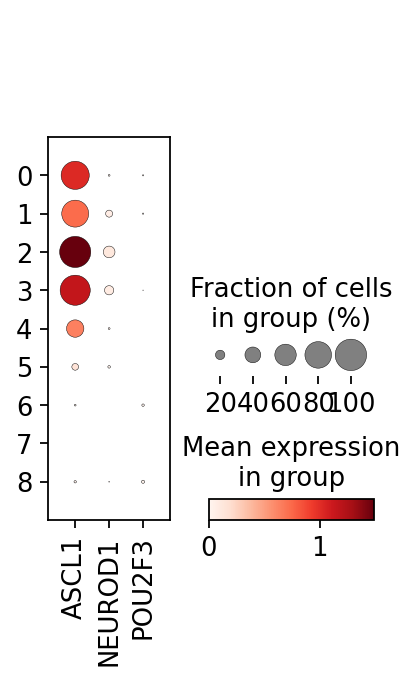

In [23]:
#for i in [50,40,30,20,10]:
    #for j in  [50,40,30,20,10]:
for i in [50]:
    j=50
    
    sc.pp.neighbors(adata_slice, n_neighbors=i, n_pcs=j)
    sce.pp.harmony_integrate(adata_slice,key='donor_id')
    
    sc.pp.neighbors(adata_slice, n_neighbors=i, n_pcs=j, use_rep = 'X_pca_harmony',key_added='harmony')
    sc.tl.leiden(adata_slice, resolution=0.3, neighbors_key='harmony',key_added='leiden_0.3') #default , resolution = 1
    sc.tl.umap(adata_slice,neighbors_key='harmony')
    sc.pl.umap(adata_slice, color=['leiden_0.3','donor_id','histo'],components='1,2', edgecolor='none', size=10, show=True, linewidths=10,legend_loc='on data')
    #sc.pl.umap(adata_slice, color=['leiden_0.3','sample_id','Group'],components='1,2', edgecolor='none', size=10, show=True, linewidths=10)
    sc.pl.dotplot(adata_slice, ['ASCL1','NEUROD1','POU2F3'], 'leiden_0.3')
    adata_slice.write('SCLC_Public_Epi_cluster_naive_primary.h5ad')

/DATA05/home/youwone/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


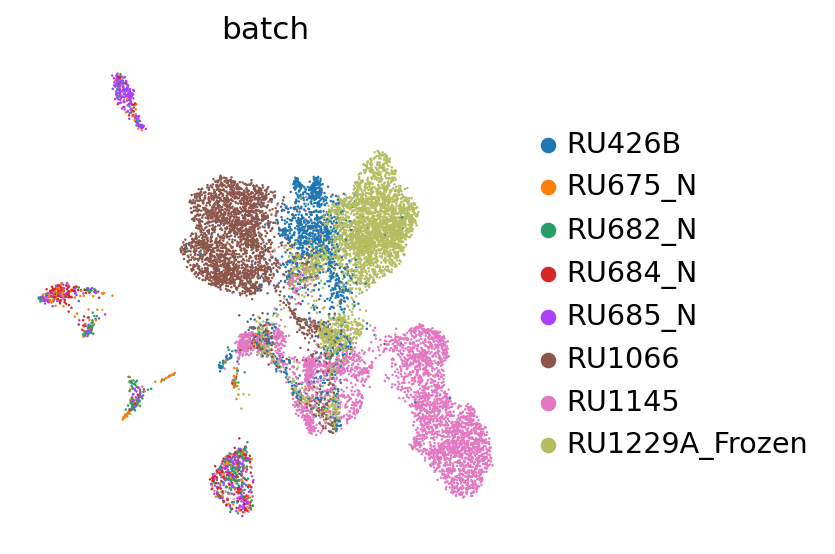

In [35]:
sc.pl.umap(adata_slice, color=['batch'],components='1,2', edgecolor='none', size=5, show=True, linewidths=10,cmap='jet',frameon=False,)

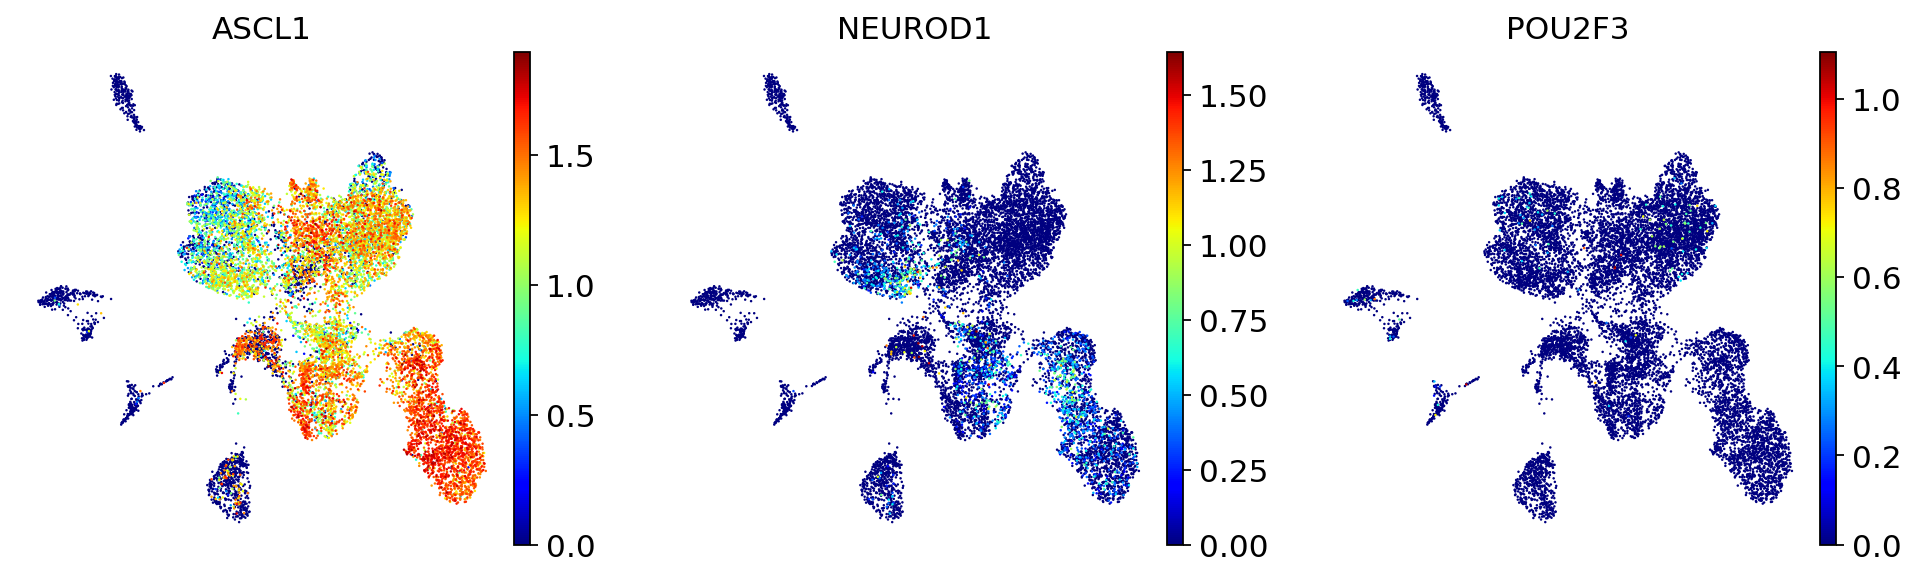

In [24]:
sc.pl.umap(adata_slice, color=['ASCL1','NEUROD1','POU2F3'],components='1,2', edgecolor='none', size=5, show=True, linewidths=10,cmap='jet',frameon=False)

/DATA05/home/youwone/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


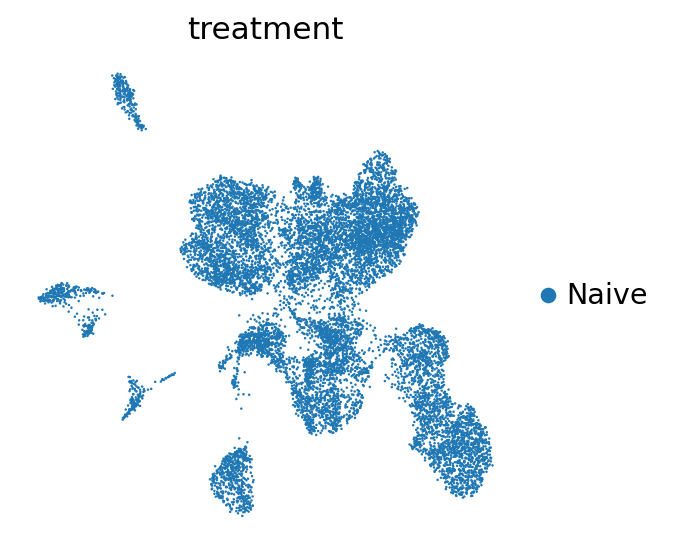

In [25]:
sc.pl.umap(adata_slice, color=['treatment'],components='1,2', edgecolor='none', size=5, show=True, linewidths=10,cmap='jet',frameon=False)

In [28]:
matplotlib.style.use('default')  

sc.settings.set_figure_params(dpi=80)

running Leiden clustering
    finished: found 13 clusters and added
    'leiden_0.7', the cluster labels (adata.obs, categorical) (0:00:02)


/DATA05/home/youwone/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/DATA05/home/youwone/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/DATA05/home/youwone/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


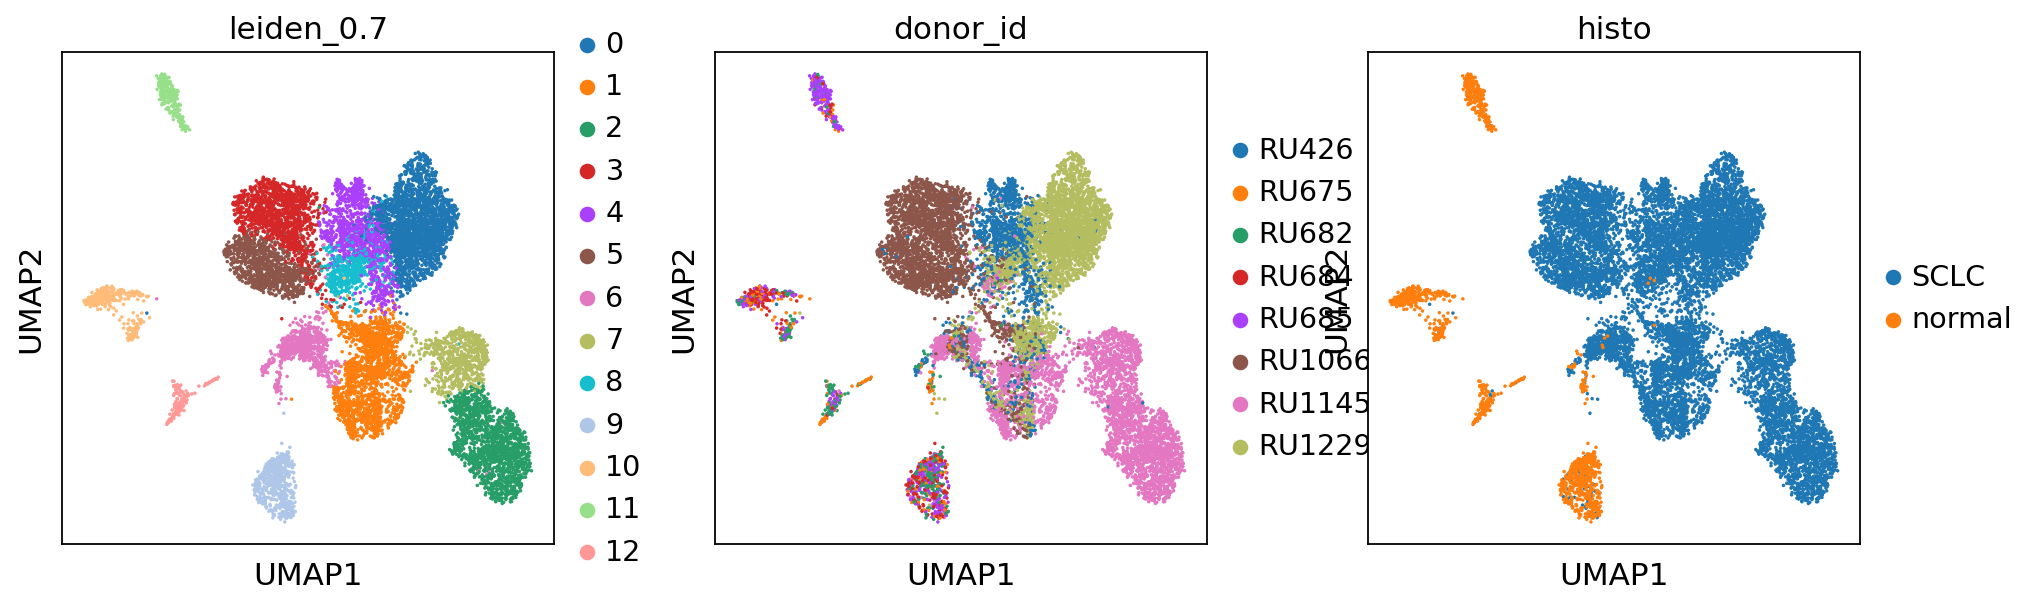

/DATA05/home/youwone/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


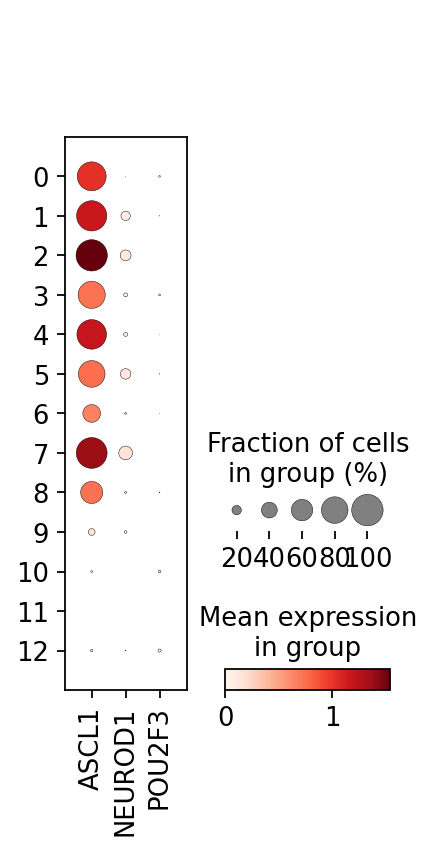

In [30]:
sc.tl.leiden(adata_slice, resolution=0.7, neighbors_key='harmony',key_added='leiden_0.7') 
sc.pl.umap(adata_slice, color=['leiden_0.7','donor_id','histo'],components='1,2', edgecolor='none', size=10, show=True, linewidths=10)
sc.pl.dotplot(adata_slice, ['ASCL1','NEUROD1','POU2F3'], 'leiden_0.7')

running Leiden clustering
    finished: found 11 clusters and added
    'leiden_0.5', the cluster labels (adata.obs, categorical) (0:00:01)


/DATA05/home/youwone/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/DATA05/home/youwone/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/DATA05/home/youwone/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


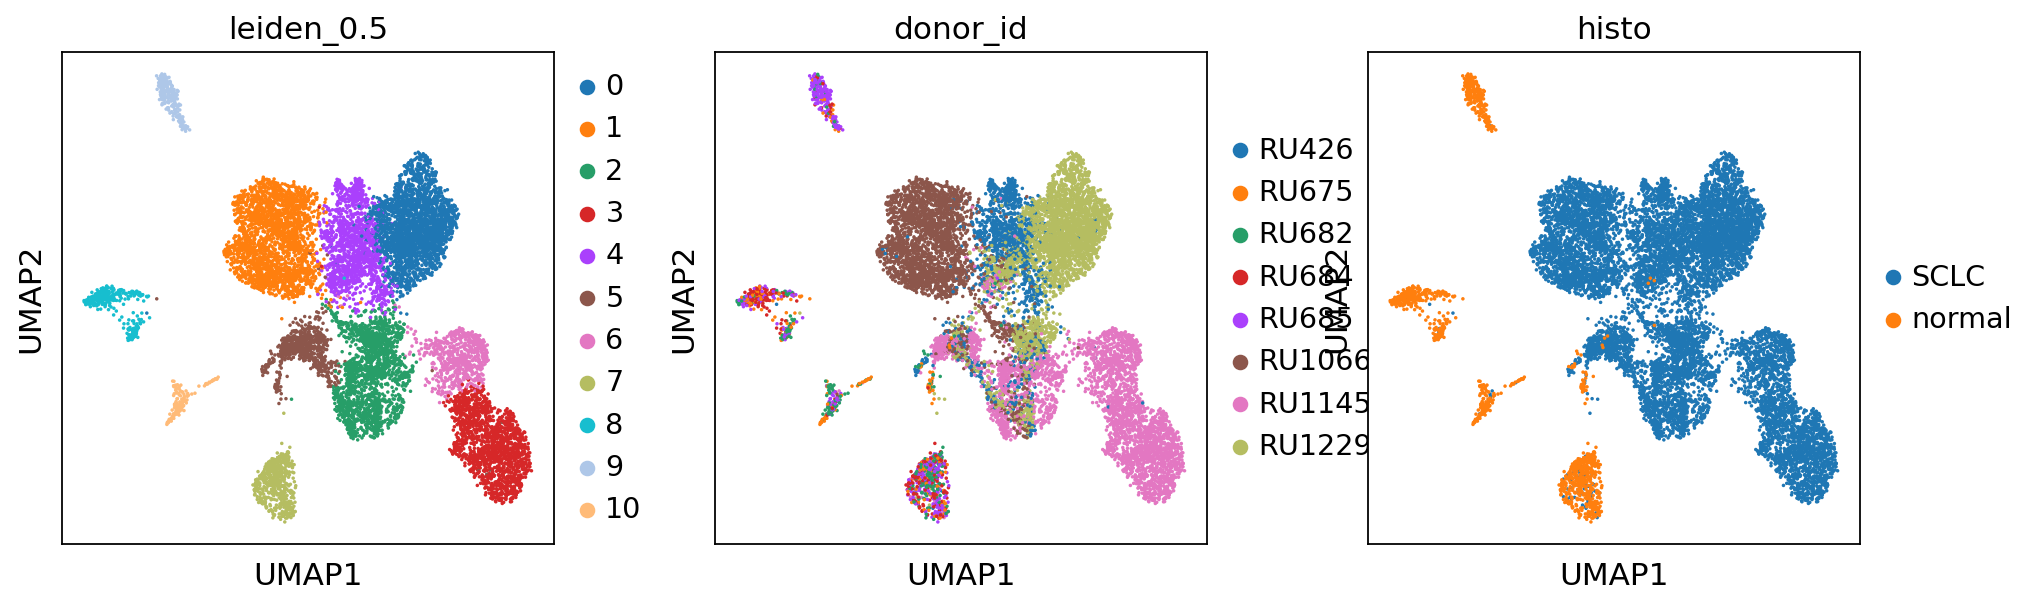

/DATA05/home/youwone/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


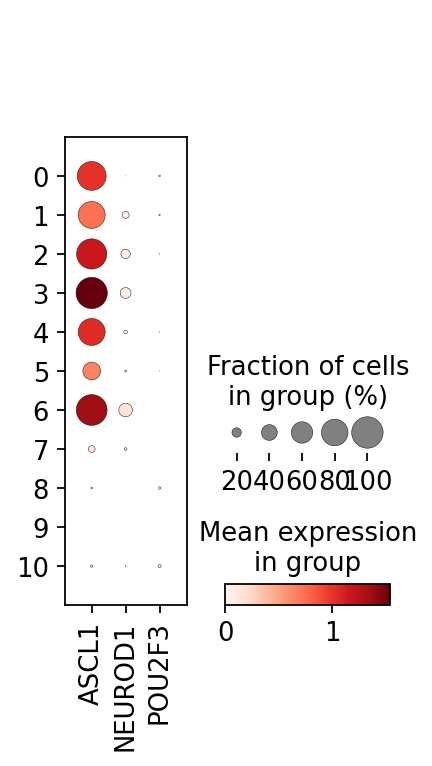

In [29]:
sc.tl.leiden(adata_slice, resolution=0.5, neighbors_key='harmony',key_added='leiden_0.5') 
sc.pl.umap(adata_slice, color=['leiden_0.5','donor_id','histo'],components='1,2', edgecolor='none', size=10, show=True, linewidths=10)
sc.pl.dotplot(adata_slice, ['ASCL1','NEUROD1','POU2F3'], 'leiden_0.5')

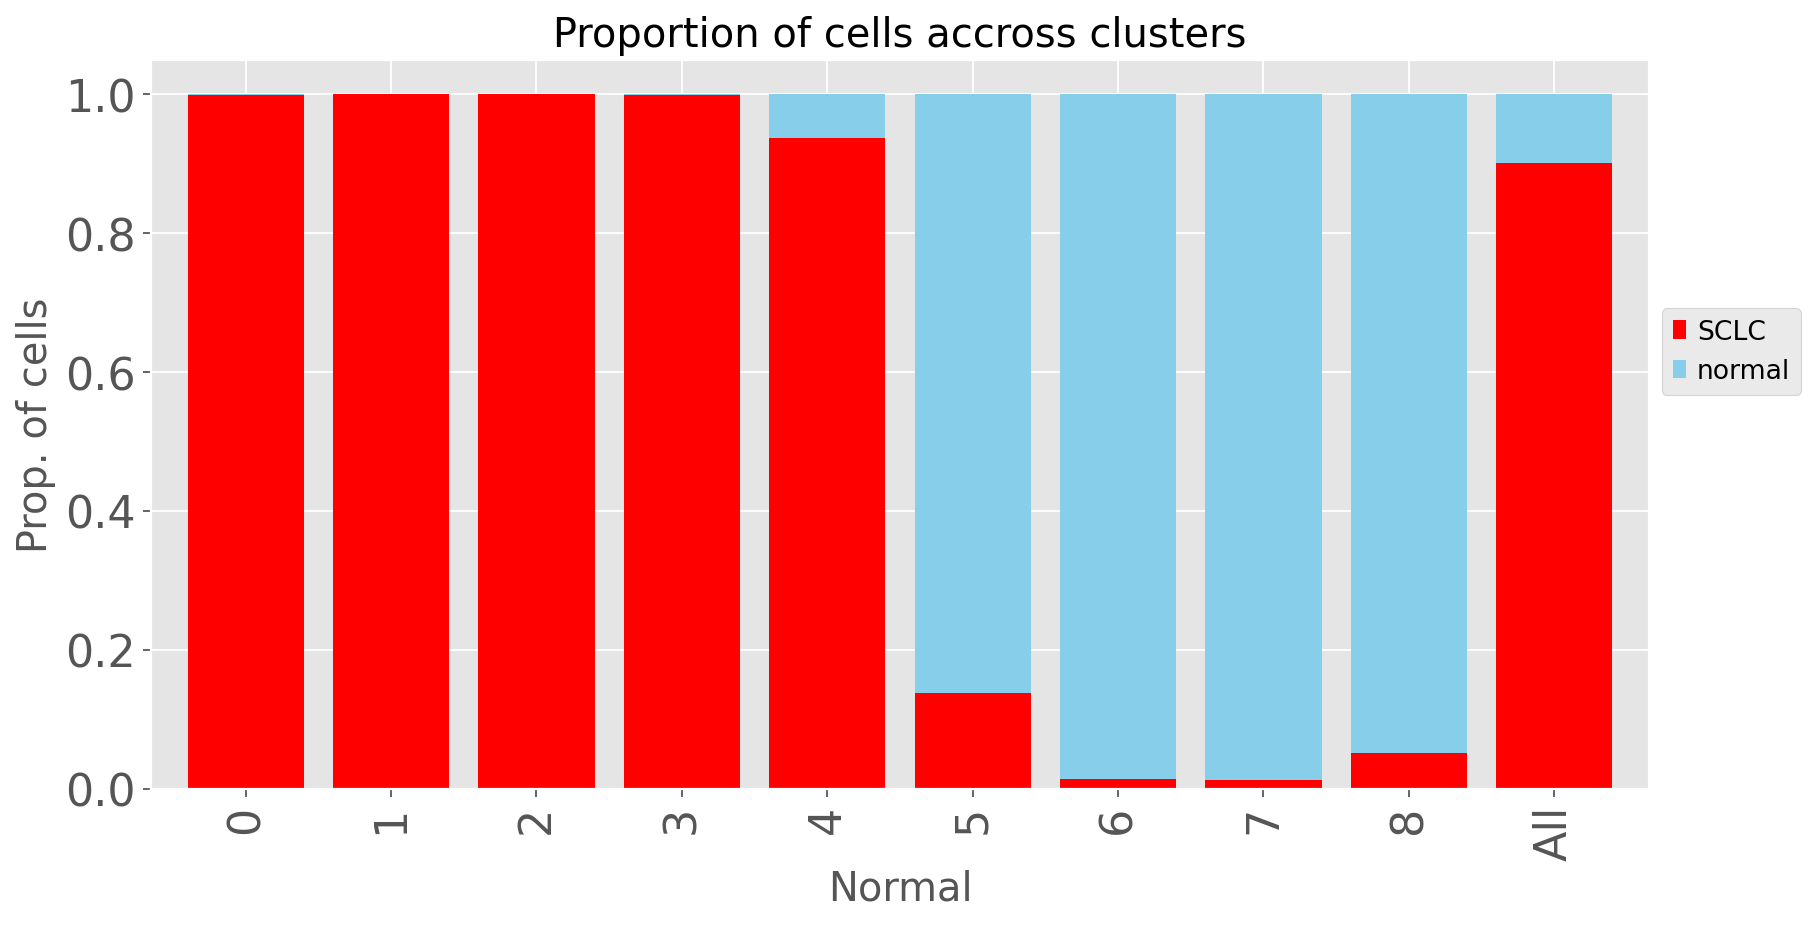

In [26]:
#-- proportion table

Groups_tab = pd.crosstab(columns=adata_slice.obs['histo'],  # Make a crosstab
                        index=adata_slice.obs['leiden_0.3'], margins=True)              # Name the count column


#-- change index and columns order
#Groups_tab = Groups_tab.reindex(['All','0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19'])
#Groups_tab = Groups_tab.reindex(['All','0','1','2','3','4','5','6','7','8','9','10'])

#Groups_tab = Groups_tab[['SLE','HD','All']]

MyTab= Groups_tab.div(Groups_tab["All"], axis=0)
MyTab2 = MyTab.drop(columns="All")

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')   
#colors
##Col_Group =["#756bb1","#78c679"] 
#Col_Group=['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#42d4f4', '#f032e6', '#bfef45', '#fabed4', 
                             #'#469990', '#dcbeff', '#9A6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#a9a9a9',
                            # '#a65628','#f781bf','#7fcdbb','#cab2d6', 
                           #"#060404", "#bdbdbd", "#addd8e","#fed976", "#7a0177",  "#df65b0",'#a65628','#33a02c',"#1f78b4",
                             #"#b2df8a","#33a02c","#fb9a99","#e31a1c", "#fdbf6f","#ff7f00","#cab2d6"]
Col_Group=['red','skyblue']
MyTab2.plot(kind="bar",
            figsize=(12,6),
            stacked=True, 
            linewidth=1, 
            width=0.8, fontsize=20, color=Col_Group)
plt.title("Proportion of cells accross clusters", fontsize=18)
plt.ylabel("Prop. of cells", fontsize=18)
plt.xlabel("Normal", fontsize=18)
plt.ylim=1.0


#plt.gca().get_legend().remove() #remove legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.6), fontsize=12)
plt.show()

/DATA05/home/youwone/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


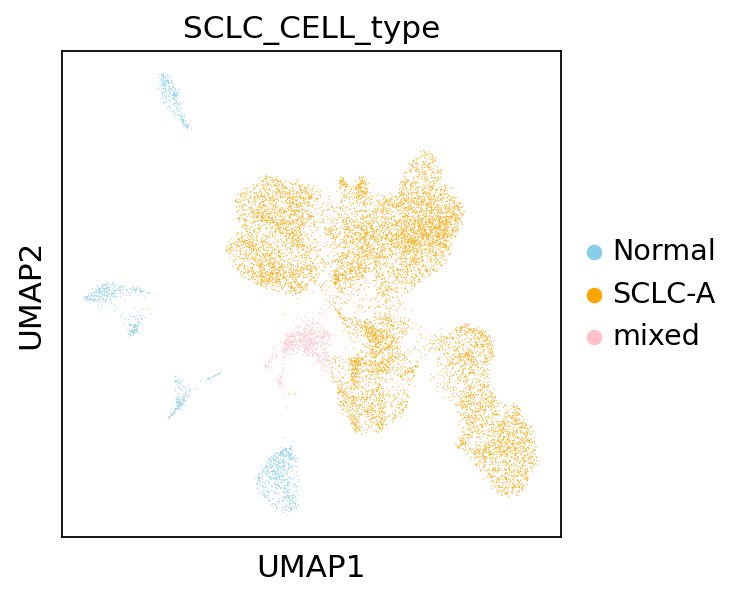

/DATA05/home/youwone/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


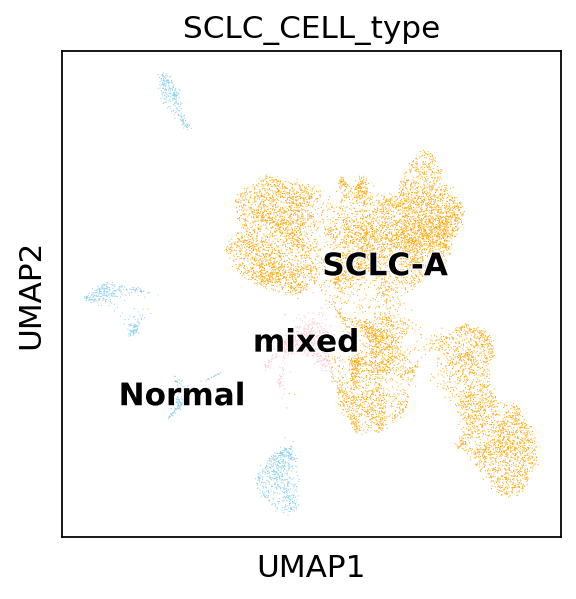

In [33]:
cluster2annotation_total = {
    '0':'SCLC-A',
    '1':'SCLC-A',
    '2':'SCLC-A',
    '3':'SCLC-A',
    '4':'mixed',
    '5':'Normal',
    '6':'Normal',
    '7':'Normal',
    '8':'Normal',
    
   
   
}    
adata_slice.obs['SCLC_CELL_type']=adata_slice.obs['leiden_0.3'].map(cluster2annotation_total).astype('category')
sc.pl.umap(adata_slice, color=['SCLC_CELL_type'],components='1,2', edgecolor='none', size=1, show=True, linewidths=10,palette=["skyblue","orange",'pink',"blue", "green", 'red','pink',"purple4", "skyblue",])
sc.pl.umap(adata_slice, color=['SCLC_CELL_type'],components='1,2', edgecolor='none', size=1, show=True, linewidths=10,legend_loc='on data',legend_fontoutline=1)

In [31]:
#Log reg for BBKNN-corrected dataset 
sc.tl.rank_genes_groups(adata_slice, 'leiden_0.3',  method='wilcoxon')
#sc.pl.rank_genes_groups(adata_slice, n_genes=25, fontsize=12,sharey=False, save='DAAN_corrected_logreg.pdf')

result = adata_slice.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame({group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names','scores','logfoldchanges','pvals_adj']}).to_csv('./Public_SCLC_primary_naive_EPI_leiden_0.3.csv')

#matplotlib.style.use('default')

#sc.tl.dendrogram(Tcell,groupby='sample')
#axs = sc.pl.rank_genes_groups_matrixplot(corrected, n_genes=3,  use_raw=False,vmin=-3,vmax=3,  cmap='bwr',layer='scaled',figsize=(12,5))
#

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:16)


In [34]:
adata_slice.write('./Public_SCLC_Epi_cluster_naive_primary.h5ad')
adata_slice

AnnData object with n_obs × n_vars = 12123 × 2048
    obs: 'ngenes', 'libsize', 'mito_frac', 'RBP_frac', 'batch', 'donor_id', 'treatment', 'procedure', 'histo', 'cell_type_coarse', 'cell_type_fine', 'cell_type_general', 'clusters', 'cell_type_med', 'H_knn', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'is_primary_data', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'organism_ontology_term_id', 'cell_type_ontology_term_id', 'suspension_type', 'HTAN_Biospecimen_ID', 'HTAN_Participant_ID', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublets', 'CELL_type', 'cnv_leiden', 'cnv_score', 'predicted_tumor', 'last', 'leiden_0.3', 'leiden_0.5', 'leiden_0.7', 'SCLC_CELL_type'
    var: 'featur